In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

from ipynb_path import *

In [2]:
from counterfactual.import_essentials import *
from counterfactual.evaluate import load_trained_model, model_cf_gen
from counterfactual.net import AdvCounterfactualModel
from counterfactual.adversarial_experiment import *
from counterfactual.adversarial_experiment import _calculate_validity_matrix
from tqdm.notebook import tqdm

plt.style.use(['science'])

In [3]:
def plot_heatmap(matrix: np.ndarray, title: str):
    import seaborn as sns
    sns.set(rc = {'figure.figsize':(6,4)})
    sns.heatmap(matrix, cmap='Oranges', linewidths=2, vmax=1,
        xticklabels=list(range(1994, 2010)), yticklabels=list(range(1994, 2010)))
    plt.title(title)

In [27]:
import wandb
run = wandb.init()
artifact_cfnet = run.use_artifact('birkhoffg/adv-counternet/run-2esra6vd-ValidityMatrix:v0', type='run_table').download()
artifact_roar = run.use_artifact('birkhoffg/adv-counternet/run-3b4qstj4-ValidityMatrix:v0', type='run_table').download()
artifact_adv_cfnet = run.use_artifact('birkhoffg/adv-counternet/run-30lrolh2-ValidityMatrix:v0', type='run_table').download()



In [23]:
def get_val_matrix(artifact_dir):
    with open(Path(artifact_dir) / 'Validity Matrix.table.json') as f:
        _validity_matrix = json.load(f)['data']
        return [arr[1:] for arr in _validity_matrix]

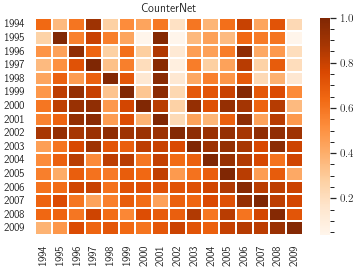

In [24]:
plot_heatmap(get_val_matrix(artifact_cfnet), 'CounterNet')

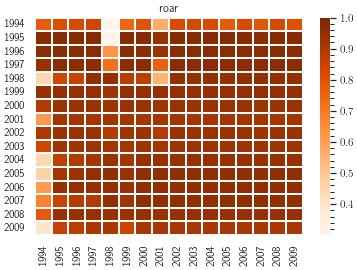

In [25]:
plot_heatmap(get_val_matrix(artifact_roar), 'roar')

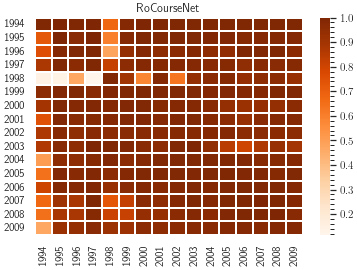

wandb: Network error (ReadTimeout), entering retry loop.
wandb: Network error (ReadTimeout), entering retry loop.
wandb: Network error (ReadTimeout), entering retry loop.


In [28]:
plot_heatmap(get_val_matrix(artifact_adv_cfnet), 'RoCourseNet')